In [3]:
import numpy as np
import mne
import matplotlib

In [13]:
data_path = '/data/datasets/timeseries/eeg/scalp/tuh/edf/000/aaaaaaaa/s001_2015_12_30/01_tcp_ar/aaaaaaaa_s001_t000.edf'
data_dir = '/data/datasets/timeseries/eeg/scalp/tuh/edf'

def is_OZ_present(data_path):
    raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
    channels = raw.ch_names
    # print(channels)
    EEG_chs = mne.pick_types(raw.info, eeg=True, eog=False, stim=False)
    mapped_chs = [i.split('-')[0].split(' ')[-1] for i in channels]
    # print(mapped_chs)
    if 'OZ' in mapped_chs:
        print('OZ is in the list', data_path)
        return True
    else:
        return False

# walk in data_dir to find .edf files and count edf files with OZ channel
import os

count = 0
total = 0
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.endswith('.edf'):
            if total % 10 == 0:
                print('Total:', total, 'Count:', count)

            total += 1
            data_path = os.path.join(root, file)
            if is_OZ_present(data_path):
                count += 1
# break from both loops when count reaches 1
            if count >= 1:
                print('Total:', total, 'Count:', count)
                break
    if count >= 1:
        break
print('Total:', total, 'Count:', count)

Total: 0 Count: 0
Total: 10 Count: 0
Total: 20 Count: 0
Total: 30 Count: 0
Total: 40 Count: 0
Total: 50 Count: 0
Total: 60 Count: 0
Total: 70 Count: 0
Total: 80 Count: 0
Total: 90 Count: 0
Total: 100 Count: 0
Total: 110 Count: 0
Total: 120 Count: 0
Total: 130 Count: 0
Total: 140 Count: 0
Total: 150 Count: 0
Total: 160 Count: 0
Total: 170 Count: 0
Total: 180 Count: 0
Total: 190 Count: 0
Total: 200 Count: 0
Total: 210 Count: 0
Total: 220 Count: 0
Total: 230 Count: 0
Total: 240 Count: 0
Total: 250 Count: 0
Total: 260 Count: 0
Total: 270 Count: 0
Total: 280 Count: 0
Total: 290 Count: 0
Total: 300 Count: 0
Total: 310 Count: 0
Total: 320 Count: 0
Total: 330 Count: 0
Total: 340 Count: 0
Total: 350 Count: 0
Total: 360 Count: 0
Total: 370 Count: 0
Total: 380 Count: 0
Total: 390 Count: 0
Total: 400 Count: 0
Total: 410 Count: 0
Total: 420 Count: 0
Total: 430 Count: 0
Total: 440 Count: 0
Total: 450 Count: 0
Total: 460 Count: 0
Total: 470 Count: 0
Total: 480 Count: 0
Total: 490 Count: 0
Total: 500 

KeyboardInterrupt: 

In [1]:
import numpy as np
import mne
import matplotlib

data_path = '/data/datasets/timeseries/eeg/scalp/tuh/edf/000/aaaaaaaa/s001_2015_12_30/01_tcp_ar/aaaaaaaa_s001_t000.edf'

raw = mne.io.read_raw_edf(data_path, preload=True, verbose=False)
print(raw.info)
print(raw.ch_names)

<Info | 8 non-empty values
 bads: []
 ch_names: EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-REF, EEG C3-REF, ...
 chs: 31 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2015-12-30 14:44:21 UTC
 nchan: 31
 projs: []
 sfreq: 256.0 Hz
 subject_info: 3 items (dict)
>
['EEG FP1-REF', 'EEG FP2-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG C3-REF', 'EEG C4-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG O1-REF', 'EEG O2-REF', 'EEG F7-REF', 'EEG F8-REF', 'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG T6-REF', 'EEG T1-REF', 'EEG T2-REF', 'EEG FZ-REF', 'EEG CZ-REF', 'EEG PZ-REF', 'EEG EKG1-REF', 'EEG LOC-REF', 'EEG ROC-REF', 'EMG-REF', 'EEG A1-REF', 'EEG A2-REF', 'RESP ABDOMEN-REF', 'IBI', 'BURSTS', 'SUPPR']


In [2]:
# get data only for EEG channels
raw_eeg = raw.copy().pick('eeg')
print(raw_eeg.info)
print(raw_eeg.ch_names)

<Info | 8 non-empty values
 bads: []
 ch_names: EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-REF, EEG C3-REF, ...
 chs: 31 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2015-12-30 14:44:21 UTC
 nchan: 31
 projs: []
 sfreq: 256.0 Hz
 subject_info: 3 items (dict)
>
['EEG FP1-REF', 'EEG FP2-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG C3-REF', 'EEG C4-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG O1-REF', 'EEG O2-REF', 'EEG F7-REF', 'EEG F8-REF', 'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG T6-REF', 'EEG T1-REF', 'EEG T2-REF', 'EEG FZ-REF', 'EEG CZ-REF', 'EEG PZ-REF', 'EEG EKG1-REF', 'EEG LOC-REF', 'EEG ROC-REF', 'EMG-REF', 'EEG A1-REF', 'EEG A2-REF', 'RESP ABDOMEN-REF', 'IBI', 'BURSTS', 'SUPPR']


(31, 323840)
(31,)


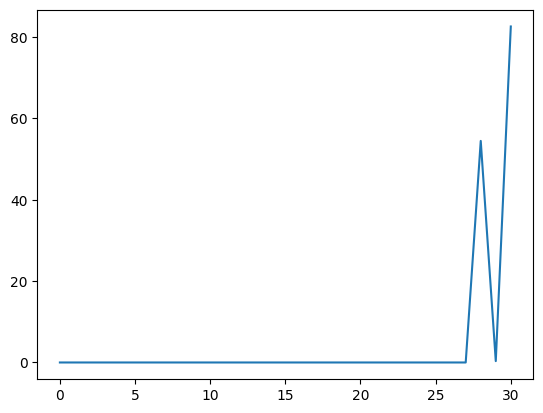

In [3]:
# get the mean of the data
data = raw_eeg.get_data()
print(data.shape)
mean_data = np.mean(data, axis=1)
print(mean_data.shape)  

# plot the mean data
import matplotlib.pyplot as plt
plt.plot(mean_data)
plt.show()